# Data Understanding

In [53]:
import chardet
with open(f"data/user.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)
# # !pip install seaborn
# !pip install chardet
# !pip install streamlit
# !pip install scikit-surprise

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DATA_PATH = "../input/dataset-fixx"

info_tourism = pd.read_csv(f"data/tourism_with_id.csv", encoding='Johab')
tourism_rating = pd.read_csv(f"data/tourism_rating.csv", encoding='ascii')
users = pd.read_csv(f"data/user.csv", encoding='ascii')

In [55]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Transportasi,Fasilitas,Jumlah Ulasan
22,23,Makam dewi serdadu,Makam ini memiliki nilai sejarah dan dipercaya...,Religi,Lamongan,0,4.6,"mobil, sepeda motor, bus,만lf","Area parkir, Kompleks makam dan taman, Masjid ...",120
10,11,Makam joko Tingkir,Makam ini merupakan tempat peristirahatan tera...,Religi,Lamongan,0,4.4,"mobil, sepeda motor, bus,만lf","Area parkir, Kompleks makam dan taman, Masjid ...",78
8,9,Makam maulana Ishaq,Maulana Ishaq dikenal sebagai ulama besar dan ...,Religi,Lamongan,0,4.7,"mobil, sepeda motor, bus,만lf","Area parkir, Kompleks makam dan taman, Masjid ...","2,881"
12,13,Pantai Putri Klayar,Pantai ini menawarkan pemandangan yang indah d...,Alam,Lamongan,10000,4.4,"mobil, sepeda motor, bus,만lf","Area parkir, Warung dan kios makanan, Fasilita...",309
0,1,Wisata Bahari Lamongan,Wisata Bahari Lamongan merupakan taman hiburan...,Themepark,Lamongan,145000,4.6,"mobil, sepeda motor, bus,만lf","Akses pantai dengan area parkir, Warung dan ki...","4,812"


In [56]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
948,37,13,4.50
1790,69,23,4.00
292,12,7,2.83
411,16,22,5.00
276,11,17,3.31


In [57]:
users.sample(5)

,User_Id,Name,Location,Age,Gender
13,14,Nadia,Nganjuk,20,Perempuan
51,52,Moh. Yoga Dwi Prasetyo,"Prambon, Sidoarjo",19,Laki-Laki
7,8,Ririn Dwi Ariyanti,"karanggeneng, lamongan",20,Perempuan
37,38,Alvin Nur Lailin Rahmat,BULANGAN DUKUN GRESIK,20,Laki-Laki
57,58,Achmad Chusnul Yakin,"Surabaya, Jawa Timur",20,Laki-Laki


In [58]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 26
Number of users : 74
The number of ratings given by the user to the dataset : 1924


# Exploratory Data Analysis

In [59]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Place_Id       26 non-null     int64  
 1   Place_Name     26 non-null     object 
 2   Description    26 non-null     object 
 3   Category       26 non-null     object 
 4   City           26 non-null     object 
 5   Price          26 non-null     int64  
 6   Rating         26 non-null     float64
 7   Transportasi   26 non-null     object 
 8   Fasilitas      26 non-null     object 
 9   Jumlah Ulasan  26 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.2+ KB


In [60]:
info_tourism.isnull().sum()

Place_Id         0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Transportasi     0
Fasilitas        0
Jumlah Ulasan    0
dtype: int64

In [61]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        1924 non-null   int64  
 1   Place_Id       1924 non-null   int64  
 2   Place_Ratings  1924 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 45.2 KB


In [23]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   74 non-null     int64 
 1   Name      74 non-null     object
 2   Location  74 non-null     object
 3   Age       74 non-null     int64 
 4   Gender    74 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.0+ KB


In [25]:
users.isnull().sum()

User_Id     0
Name        0
Location    0
Age         0
Gender      0
dtype: int64

In [26]:
info_tourism.Category.unique()

array(['Themepark', 'Edukasi', 'Alam', 'Religi', 'Olahraga', 'Kuliner',
       'Belanja', 'Alam&Kuliner'], dtype=object)

# Data Preprocessing

In [28]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 26


In [29]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,1,4.50000
1,1,2,4.50000
2,1,3,4.83000
3,1,4,5.00000
4,1,5,4.50000
...,...,...,...
1919,74,22,3.17000
1920,74,23,3.00000
1921,74,24,3.17000
1922,74,25,2.83000


In [30]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category","Price"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price
0,1,1,4.50000,Wisata Bahari Lamongan,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Themepark,145000
1,1,2,4.50000,Maharani zoo & goa,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Edukasi,40000
2,1,3,4.83000,Tanjung kodok,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Alam,100000
3,1,4,5.00000,Masjid Namira,Masjid Namira adalah masjid modern yang terken...,Lamongan,Religi,0
4,1,5,4.50000,Alun-alun Lamongan,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Olahraga,0
...,...,...,...,...,...,...,...,...
1919,74,22,3.17000,Keraton bbj babat,Keraton ini merupakan tempat bersejarah yang m...,Lamongan,Belanja,0
1920,74,23,3.00000,Makam dewi serdadu,Makam ini memiliki nilai sejarah dan dipercaya...,Lamongan,Religi,0
1921,74,24,3.17000,Pantai lohgung brondong,Pantai ini menawarkan keindahan alam dan suasa...,Lamongan,Alam,0
1922,74,25,2.83000,Makam nyi andong sari,Makam ini adalah tempat ziarah yang berhubunga...,Lamongan,Religi,0


In [31]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [32]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,1,4.50000,Wisata Bahari Lamongan,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Themepark,145000,Lamongan Themepark
1,1,2,4.50000,Maharani zoo & goa,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Edukasi,40000,Lamongan Edukasi
2,1,3,4.83000,Tanjung kodok,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Alam,100000,Lamongan Alam
3,1,4,5.00000,Masjid Namira,Masjid Namira adalah masjid modern yang terken...,Lamongan,Religi,0,Lamongan Religi
4,1,5,4.50000,Alun-alun Lamongan,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Olahraga,0,Lamongan Olahraga
...,...,...,...,...,...,...,...,...,...
1919,74,22,3.17000,Keraton bbj babat,Keraton ini merupakan tempat bersejarah yang m...,Lamongan,Belanja,0,Lamongan Belanja
1920,74,23,3.00000,Makam dewi serdadu,Makam ini memiliki nilai sejarah dan dipercaya...,Lamongan,Religi,0,Lamongan Religi
1921,74,24,3.17000,Pantai lohgung brondong,Pantai ini menawarkan keindahan alam dan suasa...,Lamongan,Alam,0,Lamongan Alam
1922,74,25,2.83000,Makam nyi andong sari,Makam ini adalah tempat ziarah yang berhubunga...,Lamongan,Religi,0,Lamongan Religi


# Data Preparation

## Missing Values

In [39]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
Price            0
city_category    0
dtype: int64

In [40]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,1,4.50,Wisata Bahari Lamongan,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Themepark,145000,Lamongan Themepark
1,1,2,4.50,Maharani zoo & goa,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Edukasi,40000,Lamongan Edukasi
2,1,3,4.83,Tanjung kodok,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Alam,100000,Lamongan Alam
3,1,4,5.00,Masjid Namira,Masjid Namira adalah masjid modern yang terken...,Lamongan,Religi,0,Lamongan Religi
4,1,5,4.50,Alun-alun Lamongan,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Olahraga,0,Lamongan Olahraga
5,1,6,5.00,Masjid Agung Lamongan,"Masjid ini merupakan ikon religi di Lamongan, ...",Lamongan,Religi,0,Lamongan Religi
6,1,7,4.00,Wego Lamongan,"Wego menawarkan wisata edukasi dan outbond, co...",Lamongan,Alam,25000,Lamongan Alam
7,1,8,5.00,Makam Sunan Drajat,Makam Sunan Drajat adalah tempat ziarah terken...,Lamongan,Religi,10000,Lamongan Religi
8,1,9,5.00,Makam maulana Ishaq,Maulana Ishaq dikenal sebagai ulama besar dan ...,Lamongan,Religi,0,Lamongan Religi
9,1,10,5.00,Museum Drajat,"Terletak di kompleks makam Sunan Drajat, museu...",Lamongan,Edukasi,0,Lamongan Edukasi


In [41]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

price = preparation.Price.tolist()

In [42]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category,
    "price":price
})

tourism_new

,id,name,category,description,city,city_category,price
0,1,Wisata Bahari Lamongan,Themepark,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Lamongan Themepark,145000
1,2,Maharani zoo & goa,Edukasi,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Lamongan Edukasi,40000
2,3,Tanjung kodok,Alam,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Lamongan Alam,100000
3,4,Masjid Namira,Religi,Masjid Namira adalah masjid modern yang terken...,Lamongan,Lamongan Religi,0
4,5,Alun-alun Lamongan,Olahraga,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Lamongan Olahraga,0
5,6,Masjid Agung Lamongan,Religi,"Masjid ini merupakan ikon religi di Lamongan, ...",Lamongan,Lamongan Religi,0
6,7,Wego Lamongan,Alam,"Wego menawarkan wisata edukasi dan outbond, co...",Lamongan,Lamongan Alam,25000
7,8,Makam Sunan Drajat,Religi,Makam Sunan Drajat adalah tempat ziarah terken...,Lamongan,Lamongan Religi,10000
8,9,Makam maulana Ishaq,Religi,Maulana Ishaq dikenal sebagai ulama besar dan ...,Lamongan,Lamongan Religi,0
9,10,Museum Drajat,Edukasi,"Terletak di kompleks makam Sunan Drajat, museu...",Lamongan,Lamongan Edukasi,0


In [44]:
top_10 = tourism_new['id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10,preparation[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

KeyError: 'Place_Id'

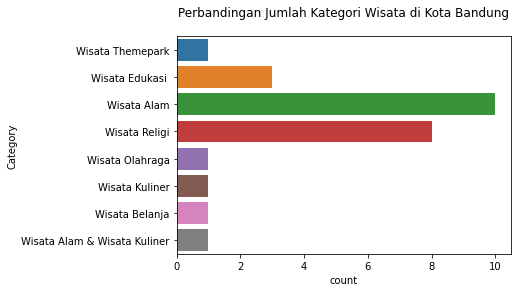

In [27]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


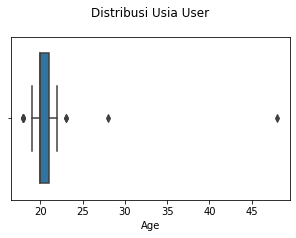

In [28]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


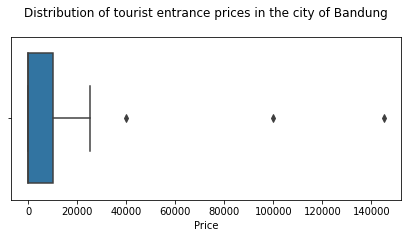

In [29]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribution of tourist entrance prices in the city of Bandung', pad=20)
plt.show()

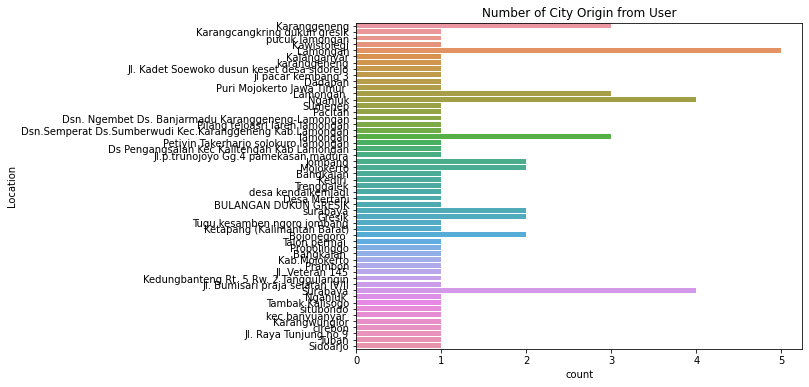

In [30]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualization of the origin of the city from the user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of City Origin from User')
plt.show()

#### 

# Content Based Filtering

In [31]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category,price
21,22,Keraton bbj babat,Wisata Belanja,Keraton ini merupakan tempat bersejarah yang m...,Lamongan,Lamongan Wisata Belanja,0.0
9,10,Museum Drajat,Wisata Edukasi,"Terletak di kompleks makam Sunan Drajat, museu...",Lamongan,Lamongan Wisata Edukasi,0.0
6,7,Wego Lamongan,Wisata Alam,"Wego menawarkan wisata edukasi dan outbond, co...",Lamongan,Lamongan Wisata Alam,25000.0
2,3,Tanjung kodok,Wisata Alam,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Lamongan Wisata Alam,100000.0
14,15,Pantai lorena,Wisata Alam,Pantai ini terkenal dengan keindahan matahari ...,Lamongan,Lamongan Wisata Alam,10000.0


## TF-IDF Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['lamongan', 'wisata', 'themepark', 'edukasi', 'alam', 'religi', 'olahraga', 'kuliner', 'belanja']


In [33]:
cv_matrix = cv.transform(data['city_category']) 
 
cv_matrix.shape 

(26, 9)

In [34]:
cv_matrix.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 1, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 0, 0, 2]])

In [35]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,lamongan,wisata,themepark,edukasi,alam,religi,olahraga,kuliner,belanja
name,,,,,,,,,
Keraton bbj babat,0,1,0,0,1,0,0,0,1
Pantai lorena,1,0,0,0,1,0,0,0,1
Makam joko Tingkir,0,0,0,0,1,0,1,0,1
Wego Lamongan,1,0,0,0,1,0,0,0,1
Pantai joko mursodo,1,0,0,0,1,0,0,0,1


## Cosine Similarity

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.65465367],
       [0.66666667, 1.        , 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 1.        ,
        0.66666667, 1.        , 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.65465367],
       [0.66666667, 0.66666667, 1.        , 0.66666667, 0.66666667,
        0.66666667, 1.        , 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.66666667,
      

In [37]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Indonesia islamic art museum,Keraton bbj babat,Istana gunung mas 27,Makam maulana Ishaq,Makam dewi serdadu
name,,,,,
Tanjung kodok,0.666667,0.666667,1.000000,0.666667,0.666667
Makam dewi serdadu,0.666667,0.666667,0.666667,1.000000,1.000000
Pantai lorena,0.666667,0.666667,1.000000,0.666667,0.666667
Pantai maldives kemantren,0.666667,0.666667,1.000000,0.666667,0.666667
Masjid Namira,0.666667,0.666667,0.666667,1.000000,1.000000
Keraton bbj babat,0.666667,1.000000,0.666667,0.666667,0.666667
Makam sunan Sendang,0.666667,0.666667,0.666667,1.000000,1.000000
Pantai lohgung brondong,0.666667,0.666667,1.000000,0.666667,0.666667
Pantai Putri Klayar,0.666667,0.666667,1.000000,0.666667,0.666667


## Recommendation

In [38]:
def generate_candidates(city=None, max_price=None, items=data[['id', 'name', 'category', 'description', 'city', 'price']]):
    filtered_items = items
    if city:
        filtered_items = filtered_items[filtered_items['city'] == city]
    if max_price:
        filtered_items = filtered_items[filtered_items['price'] <= max_price]
    return filtered_items

In [54]:
# Originall
# def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
#     index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
#     closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
#     closest = closest.drop(place_name,errors='ignore')
    
#     return pd.DataFrame(closest).merge(items).head(k)

In [39]:
# tourism_recommendations("Air Mancur Menari")
generate_candidates(city="Lamongan", max_price=100000).head(5)

,id,name,category,description,city,price
1,2,Maharani zoo & goa,Wisata Edukasi,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,40000.0
2,3,Tanjung kodok,Wisata Alam,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,100000.0
3,4,Masjid Namira,Wisata Religi,Masjid Namira adalah masjid modern yang terken...,Lamongan,0.0
4,5,Alun-alun Lamongan,Wisata Olahraga,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,0.0
5,6,Masjid Agung Lamongan,Wisata Religi,"Masjid ini merupakan ikon religi di Lamongan, ...",Lamongan,0.0


In [40]:
# tourism_recommendations("Trans Studio Bandung")
generate_candidates("Lamongan", 110000).head(5)

,id,name,category,description,city,price
1,2,Maharani zoo & goa,Wisata Edukasi,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,40000.0
2,3,Tanjung kodok,Wisata Alam,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,100000.0
3,4,Masjid Namira,Wisata Religi,Masjid Namira adalah masjid modern yang terken...,Lamongan,0.0
4,5,Alun-alun Lamongan,Wisata Olahraga,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,0.0
5,6,Masjid Agung Lamongan,Wisata Religi,"Masjid ini merupakan ikon religi di Lamongan, ...",Lamongan,0.0


# Collaborative Filtering

In [41]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [42]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,1,4.50000
1,1,2,4.50000
2,1,3,4.83000
3,1,4,5.00000
4,1,5,4.50000
...,...,...,...
1919,74,22,3.17000
1920,74,23,3.00000
1921,74,24,3.17000
1922,74,25,2.83000


## Data Preparation

### Encode

In [43]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [44]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [45]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [46]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 74, Number of Place: 26, Min Rating: 0.0, Max Rating: 5.0


## Train Test Split

In [47]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
1259,49,12,3.00,48,11
1623,63,12,3.33,62,11
611,24,14,3.17,23,13
514,20,21,5.00,19,20
413,16,24,0.00,15,23
...,...,...,...,...,...
1130,44,13,3.33,43,12
1294,50,21,3.33,49,20
860,34,3,3.83,33,2
1459,57,4,5.00,56,3


In [48]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[48 11]
 [62 11]
 [23 13]
 ...
 [33  2]
 [56  3]
 [43  8]] [0.6        0.66599998 0.63400002 ... 0.76599998 1.         1.        ]


## Training

In [50]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [51]:
model = RecommenderNet(num_users, num_place, 100)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [52]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
193/193 [==============================] - 3s 5ms/step - loss: 0.8724 - root_mean_squared_error: 0.4282 - val_loss: 0.8681 - val_root_mean_squared_error: 0.4283
Epoch 2/100
193/193 [==============================] - 1s 4ms/step - loss: 0.7484 - root_mean_squared_error: 0.3681 - val_loss: 0.8550 - val_root_mean_squared_error: 0.4213
Epoch 3/100
193/193 [==============================] - 1s 4ms/step - loss: 0.6771 - root_mean_squared_error: 0.3259 - val_loss: 0.8458 - val_root_mean_squared_error: 0.4162
Epoch 4/100
193/193 [==============================] - 1s 3ms/step - loss: 0.6751 - root_mean_squared_error: 0.3220 - val_loss: 0.8374 - val_root_mean_squared_error: 0.4116
Epoch 5/100
193/193 [==============================] - 1s 3ms/step - loss: 0.6701 - root_mean_squared_error: 0.3184 - val_loss: 0.8272 - val_root_mean_squared_error: 0.4074
Epoch 6/100
193/193 [==============================] - 1s 3ms/step - loss: 0.6412 - root_mean_squared_error: 0.2993 - val_loss: 0.8158 

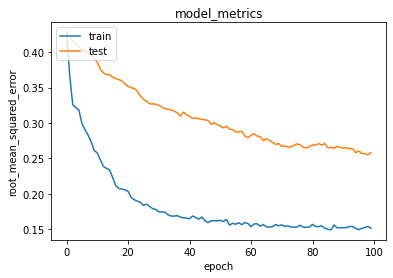

In [53]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

In [61]:
place_df = tourism_new
df = pd.read_csv(f'{DATA_PATH}/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)
print(f"User ID: {user_id}")
print(f"Places visited by user: {place_visited_by_user['Place_Id'].values}")
print(f"Place IDs in place_df: {place_df['id'].values}")
print(f"Place IDs not visited: {place_not_visited}")

User ID: 32
Places visited by user: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
Place IDs in place_df: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
Place IDs not visited: []


In [62]:
# Check if all places are visited
if not place_not_visited:
    print(f"User {user_id} has visited all available places.")
    print("Predicting top visited places based on user's preferences:")
    
    # Prepare data for places already visited
    place_visited_encoded = [[place_to_place_encoded.get(x)] for x in place_visited_by_user['Place_Id'].values]
    user_place_array = np.hstack(
        ([[user_encoder]] * len(place_visited_encoded), place_visited_encoded)
    )
    
    # Predict ratings for visited places
    ratings = model.predict(user_place_array).flatten()
    
    # Get top 10 places from visited places
    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_place_ids = [
        place_encoded_to_place.get(place_visited_encoded[x][0]) for x in top_ratings_indices
    ]
    
    # Display top visited places
    place_df_rows = place_df[place_df['id'].isin(recommended_place_ids)]
    print(pd.DataFrame(place_df_rows))
else:
    # Standard recommendation flow
    place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
    user_encoder = user_to_user_encoded.get(user_id)
    user_place_array = np.hstack(
        ([[user_encoder]] * len(place_not_visited), place_not_visited)
    )
    
    # Predict ratings for unvisited places
    ratings = model.predict(user_place_array).flatten()
    
    # Get top 10 recommendations
    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_place_ids = [
        place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
    ]
    
    print('Showing recommendations for user: {}'.format(user_id))
    print('===' * 9)
    print('Places with high predicted ratings for the user:')
    print('----' * 8)
    
    # Display recommended places
    place_df_rows = place_df[place_df['id'].isin(recommended_place_ids)]
    print(pd.DataFrame(place_df_rows))


User 32 has visited all available places.
Predicting top visited places based on user's preferences:
    id                    name                      category  \
0    1  Wisata Bahari Lamongan              Wisata Themepark   
1    2      Maharani zoo & goa               Wisata Edukasi    
2    3           Tanjung kodok                   Wisata Alam   
3    4           Masjid Namira                 Wisata Religi   
4    5      Alun-alun Lamongan               Wisata Olahraga   
5    6   Masjid Agung Lamongan                 Wisata Religi   
7    8      Makam Sunan Drajat                 Wisata Religi   
10  11      Makam joko Tingkir                 Wisata Religi   
20  21                  Bathil                Wisata Kuliner   
25  26               Cafe Aola  Wisata Alam & Wisata Kuliner   

                                          description      city  \
0   Wisata Bahari Lamongan merupakan taman hiburan...  Lamongan   
1   Objek wisata ini menggabungkan kebun binatang ...  Lamon

In [64]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category,price
0,1,Wisata Bahari Lamongan,Wisata Themepark,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Lamongan Wisata Themepark,145000.0
1,2,Maharani zoo & goa,Wisata Edukasi,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Lamongan Wisata Edukasi,40000.0
2,3,Tanjung kodok,Wisata Alam,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Lamongan Wisata Alam,100000.0
3,4,Masjid Namira,Wisata Religi,Masjid Namira adalah masjid modern yang terken...,Lamongan,Lamongan Wisata Religi,0.0
4,5,Alun-alun Lamongan,Wisata Olahraga,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Lamongan Wisata Olahraga,0.0
5,6,Masjid Agung Lamongan,Wisata Religi,"Masjid ini merupakan ikon religi di Lamongan, ...",Lamongan,Lamongan Wisata Religi,0.0
7,8,Makam Sunan Drajat,Wisata Religi,Makam Sunan Drajat adalah tempat ziarah terken...,Lamongan,Lamongan Wisata Religi,10000.0
10,11,Makam joko Tingkir,Wisata Religi,Makam ini merupakan tempat peristirahatan tera...,Lamongan,Lamongan Wisata Religi,0.0
20,21,Bathil,Wisata Kuliner,Bathil adalah kawasan pelabuhan tradisional ya...,Lamongan,Lamongan Wisata Kuliner,5000.0
25,26,Cafe Aola,Wisata Alam & Wisata Kuliner,Cafe Aola adalah tempat nongkrong yang nyaman ...,Lamongan,Lamongan Wisata Alam & Wisata Kuliner,25000.0
